This notebook was to deepen Fraser River channel at beginning and widen it to New Westminster, other depth does not change(same with bathymetry5) 

In [1]:
from salishsea_tools import (bathy_tools, nc_tools,viz_tools,tidetools)
from numpy import loadtxt
from __future__ import division, print_function
from salishsea_tools.nowcast import figures
import scipy.io as sio
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
%matplotlib inline

In [2]:
bathy = nc.Dataset('/ocean/jieliu/research/meopar/\
/nemo-forcing/grid/bathy_meter_SalishSea.nc', 'r')
bathyy = bathy.variables['Bathymetry'][:]

In [3]:
axis_font = {'fontname': 'Bitstream Vera Sans', 'size': '13'}

To see the bathymetry of the very beginning of original bathymetry

In [4]:
!cp /ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea.nc \
bathy_meter_SalishSea6.nc

In [5]:
bathy_6 = nc.Dataset('bathy_meter_SalishSea6.nc','r+' )
bathyy_6 = bathy_6.variables['Bathymetry'][:]
lon_6 = bathy_6.variables['nav_lon']
lat_6 = bathy_6.variables['nav_lat']

/home/jieliu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/jieliu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


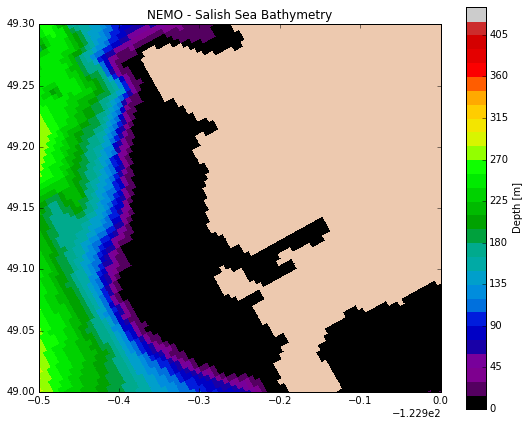

In [6]:
fig = bathy_tools.plot_colourmesh(
    bathy_6, 'NEMO - Salish Sea Bathymetry', 
    axis_limits=(-123.4, -122.9, 49., 49.3), colour_map='spectral', bins=30)

(300, 340, 410, 430)

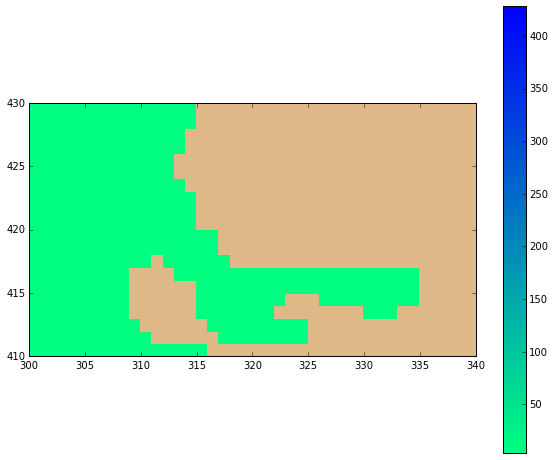

In [7]:
bath, X, Y = tidetools.get_bathy_data(bathy_6)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bath, cmap=cmap)
fig.colorbar(mesh)
plt.axis((300, 340, 410, 430))

In [8]:
import pandas as pd
river_north = pd.read_csv("river-bathy-north.txt", header = None)

In [9]:
## to put the range of lat, lon indices and bathymetry into list
lat_ind = []
lon_ind = []
remain_edit_bathy = []
for j in np.arange(410, 430):
    for i in np.arange(300, 340):
        if bathyy_6[j, i] <> 0:
            lat_ind.append(j)
            lon_ind.append(i)
            remain_edit_bathy.append(bathyy_6[j,i])
            #print (j, i, bathyy_6[j,i])

In [10]:
len(lat_ind)

353

In [11]:
## This is important! Remove the duplictes with bathymetry 5.
#Find the indices of overlapped values first and put them
# into duplicate list. Then delete value 
#from the very bottom
# 
duplicate = []
for (ind0) in np.arange(len(lat_ind)):
    for (iind0) in np.arange(len(river_north[0])):
        if (lat_ind[ind0] == river_north[0][iind0]) & (lon_ind[ind0] == river_north[1][iind0]):
            #lat_ind.remove()
            duplicate.append(ind0)
for v0 in duplicate[::-1]: ## delete from the very bottom in safety
    del lat_ind[v0]
    del lon_ind[v0]
    del remain_edit_bathy[v0]    

In [12]:
len(lat_ind)

324

In [13]:
## write lat_ind, lon_ind and remain_edit_bathy into a txt file
with open('river_channel_beginning.txt', 'w') as f:
    for ii, jj, kk in zip(lat_ind, lon_ind, remain_edit_bathy):
        f.writelines( '%s %s %s \n' %(ii, jj, kk) )

# Assign values to bathymetry 6

In [48]:
lines = loadtxt("river-bathy-north.txt", comments="#", delimiter=",", unpack=False)

In [77]:
list_of_lists = []
with open('river-bathy-north.txt') as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        # in alternative, if you need to use the file content as numbers
        # inner_list = [int(elt.strip()) for elt in line.split(',')]
        list_of_lists.append(inner_list)
list_of_lists[0]

['431', '291', '95.']

In [16]:
by_cols = zip(*list_of_lists)
by_cols
col_names = ('latitude index', 'longitude index', 'bathymetry')
by_names = {}
for i, col_name in enumerate(col_names):
    by_names[col_name] = by_cols[i]

In [17]:
lat_index = np.asarray(by_names['latitude index'])
lon_index = np.asarray(by_names['longitude index'])
bathy_index = np.asarray(by_names['bathymetry'])
jj = lat_index.astype(np.integer)
ii = lon_index.astype(np.integer)
bathy_value  = bathy_index.astype(np.float)
lat_index.shape

(223,)

In [18]:
for i in np.arange(len(jj)):
    bathyy_6[jj[i], ii[i]] = bathy_value[i] + 3.095 ## assign values added with 3.095 mean sea level
bathyy_6[500, 395]

13.095000000000001

In [19]:
bathyy[500,395]

masked

In [82]:
river_beginning =  loadtxt("river_channel_beginning.txt")